In [4]:
print '''On June 26, 2015, the United States supreme court voted 5-4 to
fully legalize gay marriage in the country.
All 3 female justices were in favor, as were 2 of the 6 male justices.
All 4 dissenters were male.
I wondered if the gender bias was statistically significant.
In short, it is not (p = 0.12).'''

On June 26, 2015, the United States supreme court voted 5-4 to
fully legalize gay marriage in the country.
All 3 female justices were in favor, as were 2 of the 6 male justices.
All 4 dissenters were male.
I wondered if the gender bias was statistically significant.
In short, it is not (p = 0.12).


In [8]:
print 'Fisher exact test:'
from scipy.stats import fisher_exact
odds_ratio, p = stats.fisher_exact([[2,4],[3,0]], alternative='less')
print 'p = %.3f' % p

Fisher exact test:
p = 0.119


In [60]:
print 'Samples too small for chi-square'

Samples too small for chi-square


In [9]:
print 'Permutation test:'
import numpy as np
genders = ['F']*3 + ['M'] * 6
women_majority = []
trials = 10000
for i in range(trials):
    majority_votes = np.random.choice(genders, 5, replace=False)
    women_majority.append((majority_votes == 'F').sum())

print 'p = %.3f' % (sum(np.array(women_majority) == 3) / float(trials))

Permutation test:
p = 0.119


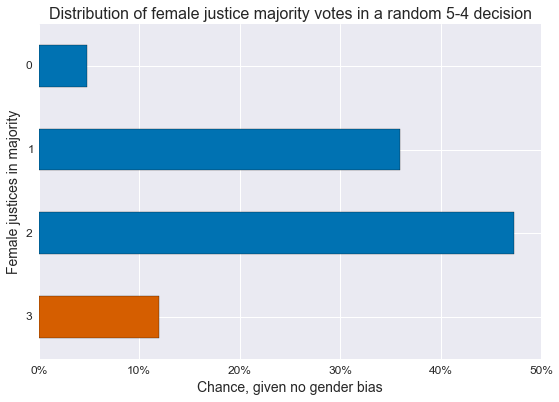

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
fig, ax = plt.subplots(1)
counts = pd.Series(women_majority).value_counts(normalize=True).sort_index()
blue, green, orange = sns.color_palette()[:3]
counts[::-1].plot(kind='barh', ax=ax, colors=[orange, blue, blue, blue])
ax.set_xticklabels(['%.0f%%' % (t*100) for t in ax.get_xticks()])
ax.set_ylabel('Female justices in majority')
ax.set_xlabel('Chance, given no gender bias')
ax.set_title('Distribution of female justice majority votes in a random 5-4 decision')